In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, plot_roc_curve

In [2]:
data = pd.read_csv("heart failure.csv")
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0.0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0.0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0.0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0.0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1.0,20,0,327000.00,2.7,116,0,0,8,1


In [20]:
data.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    3
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [26]:
data["diabetes"].fillna(data.groupby("high_blood_pressure")["diabetes"].transform("median"), inplace = True)

In [27]:
data.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [29]:
data["diabetes"].value_counts()

0.0    174
1.0    125
Name: diabetes, dtype: int64

In [30]:
data.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [31]:
features = ['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking']

In [32]:
feature_list = list(enumerate(features))

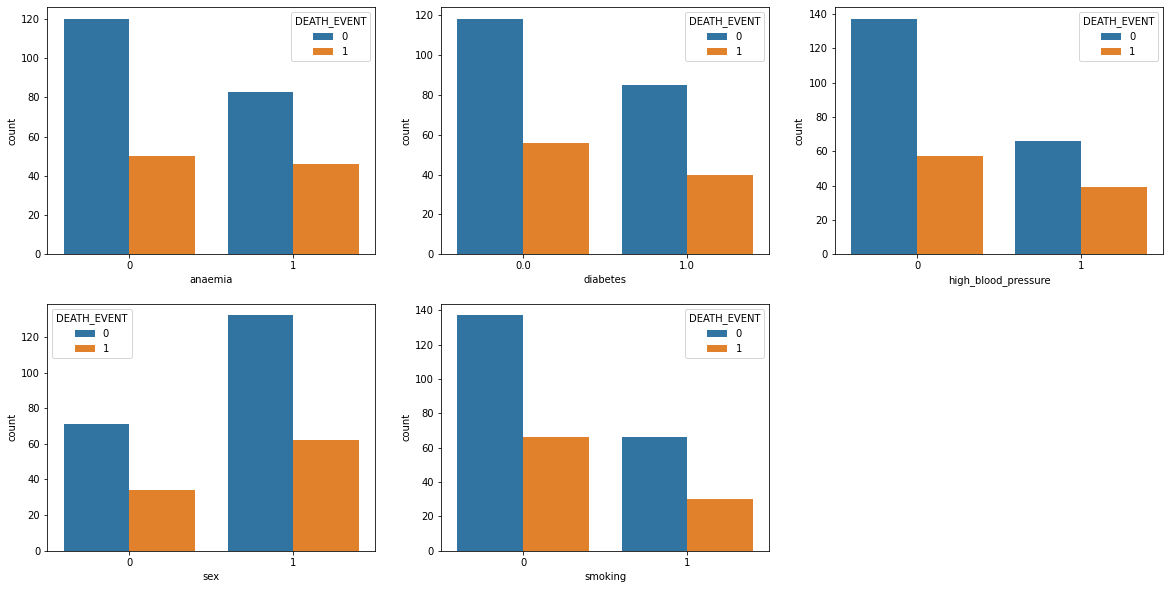

In [33]:
plt.figure(figsize = (20, 10))
for i in feature_list:
    plt.subplot(2, 3, i[0] + 1)
    sns.countplot(x = i[1], hue = "DEATH_EVENT", data = data)

In [34]:
x = data.drop("DEATH_EVENT", axis = 1)
y = data["DEATH_EVENT"]

In [35]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.3, random_state= 0)

# Random Forest

In [36]:
rf = RandomForestClassifier(n_estimators= 30)

In [38]:
rf.fit(x_train, y_train)

RandomForestClassifier(n_estimators=30)

In [39]:
y_pred = rf.predict(x_test)

In [40]:
y_pred

array([0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int64)

In [41]:
score = accuracy_score(y_test, y_pred)

In [42]:
score

0.8777777777777778

In [43]:
cm = confusion_matrix(y_test, y_pred)

In [44]:
cm

array([[59,  3],
       [ 8, 20]], dtype=int64)

In [45]:
rf.fit(x_test, y_test)

RandomForestClassifier(n_estimators=30)

In [46]:
yp = rf.predict(x_test)

In [48]:
ac = accuracy_score(y_test, yp)

In [49]:
ac

1.0

In [50]:
cm1 = confusion_matrix(y_test, yp)

In [51]:
cm1

array([[62,  0],
       [ 0, 28]], dtype=int64)

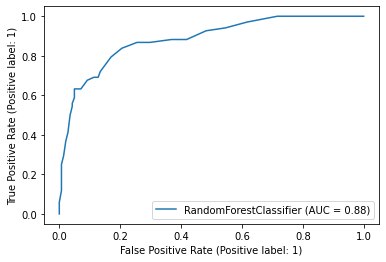

In [54]:
plot_roc_curve(rf, x_train, y_train)

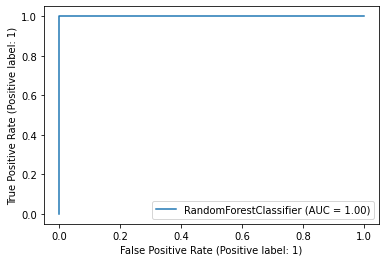

In [55]:
plot_roc_curve(rf, x_test, y_test)